# Problem Statement

### The problem statement is about predicting the demand for shared bikes in a US market.

## Business Context:-
### BoomBikes is a bike-sharing company in the US that allows users to rent bikes for short-term use.
### Due to the COVID-19 pandemic, the company has seen a drop in revenue and is struggling to sustain itself.
### As the pandemic situation improves, the company wants to predict how the demand for shared bikes will change. This will help them adjust their business strategy to meet future demand.


## What  does the company wants to know?

### 1) Which variables are significant in predicting the demand for shared bikes.

### 2) How well those variables describe the bike demands



# I. Data Understanding and Preparation

## Index Variables:

### instant:  record index 

## Date Variables:

### dteday:  This column represents the date of the observation.

## Time-related Variables:

### yr: This column represents the year. It takes two values:
####    0: Corresponds to the year 2018.
####    1: Corresponds to the year 2019.

### mnth:  This column represents the month (1 for January, 2 for February, etc.)

### weekday:  This column represents the day of the week (0 for Sunday, 1 for Monday, etc.)



## Season and Weather-related Variables:

### season: This column represents the season of the year. The values correspond to:
####   1: Spring
####   2: Summer
####   3: Fall
####   4: Winter

### weathersit: This column represents the weather situation. The values correspond to:
####   1: Clear, Few clouds, Partly cloudy
####   2: Mist + Cloudy, Mist + Broken clouds
####   3: Light snow, Light rain
####   4: Heavy rain, Ice pellets



## Users-related Variables:

### casual: This column represents the number of casual users (people who rented bikes without prior registration)

### registered: This column represents the number of registered users (people who rented bikes with prior registration)

### cnt: This is the target variable, representing the total number of bike rentals on a given day (sum of casual and registered users)


## Environmental Variables:
### temp: Temperature in Celsius 

### atemp: "feels-like" temperature in Celsius 

### hum: humidity 

### windspeed: wind speed

## Holiday and Working Day Indicators:

###  holiday: This column indicates whether the day was a holiday (1 if it was a holiday, 0 otherwise)

### workingday: This column indicates whether the day was a working day (1 if it was a working day, 0 otherwise)


# Step 1: Importing the Necessary Libraries

In [384]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### This block imports all the necessary libraries for data manipulation, visualization, machine learning, and statistical analysis. The warnings.filterwarnings('ignore') is used to suppress warning messages, keeping the output clean.


# Step 2: Loading the Dataset

In [385]:
# Loading the dataset into the Data Frame
Bike_Share= pd.read_csv("day.csv")

# Displaying the first few rows of the dataset
print(Bike_Share.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [386]:
# Displaying the number of Rows and Columns in the Bike Share Data Frame.
Bike_Share.shape

(730, 16)

### The dataset contains 730 Rows and 16 Columns totally

In [387]:
# Displaying the initial information of the Bike Share Data Frame
Bike_Share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### The dataset is loaded into a pandas DataFrame. The first few rows and the shape (rows, columns) of the dataset are displayed for initial inspection.

### As we can see there are 730 non-null rows in all the Columns, there are no missing values in the given dataset. 

### Continous Variables: The 'temp', 'atemp', 'hum', and 'windspeed' variables are numeric variables.

### Categorical Variables: Variables such as 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', and 'weathersit' are categorical variables.



In [388]:
# Displaying the Descriptive Statistics of the Dataset 
print(Bike_Share.describe())
# Setting the display options for visibility of complete rows and colums.
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 50)

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

# Step 3: Exploratory Data Analysis(EDA) & Data Visualization

## A. Univariate Analysis:

## 1) on Temperature:

Text(0.5, 0, 'Temperature')

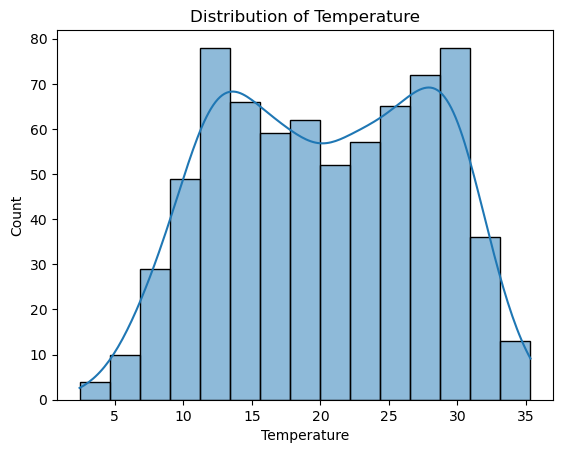

In [389]:
sns.histplot(Bike_Share.temp, bins = 15, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')

### This code block visualizes the distribution of temperature using a histogram and kernel density estimate (KDE). Similar plots are created for other variables to understand their distributions.

## 2) on Feels-Like Temperature:

Text(0.5, 0, 'feels-like Temperature')

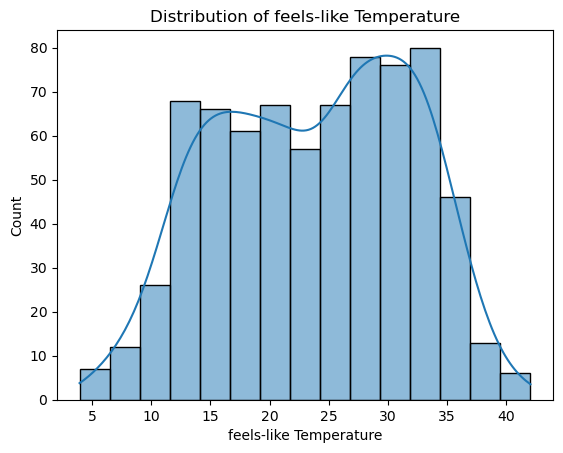

In [390]:
sns.histplot(Bike_Share.atemp, bins = 15, kde=True)
plt.title('Distribution of feels-like Temperature')
plt.xlabel('feels-like Temperature')

### Both temp and atemp show a fairly uniform distribution, peaking around mid-range values (15-30°C). These are likely crucial predictors of bike rental activity.

## 3) on Humidity:

Text(0.5, 0, 'Humidity')

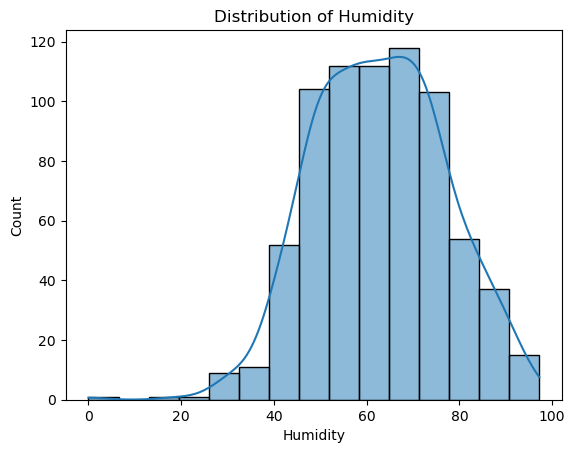

In [391]:
sns.histplot(Bike_Share.hum, bins = 15, kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')

### Humidity displays a near-normal distribution, peaking around 60-80%. Extreme values are relatively rare.

## 4) On Windspeed:

Text(0.5, 0, 'WindSpeed')

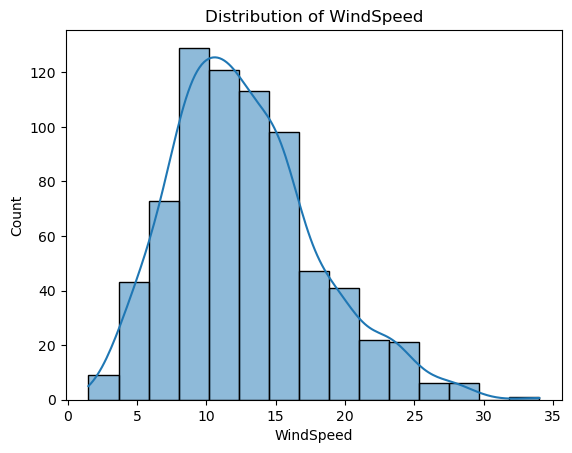

In [392]:
sns.histplot(Bike_Share.windspeed, bins = 15, kde=True)
plt.title('Distribution of WindSpeed')
plt.xlabel('WindSpeed')

### The windspeed distribution is slightly right-skewed, with most days having low to moderate wind speeds, and fewer instances of higher wind speeds.

## 5) on number of Casual users:

Text(0.5, 0, 'Casual Users')

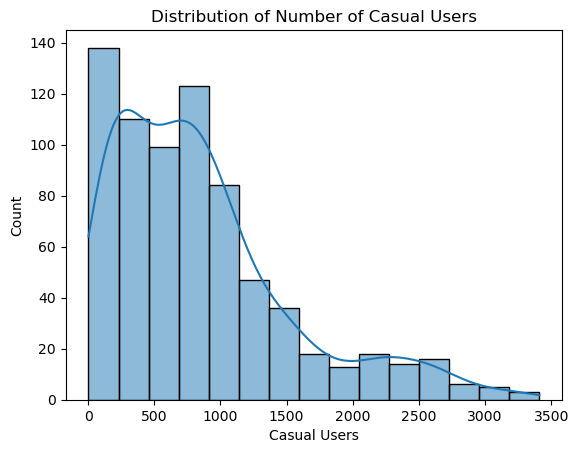

In [393]:
sns.histplot(Bike_Share.casual, bins = 15, kde=True)
plt.title('Distribution of Number of Casual Users')
plt.xlabel('Casual Users')

### The distribution of casual users (non-registered bike rentals) is right-skewed, indicating that most casual users rent fewer bikes, with fewer days of high casual rental activity.

## 6) on number of Registered users:

Text(0.5, 0, 'Registered Users')

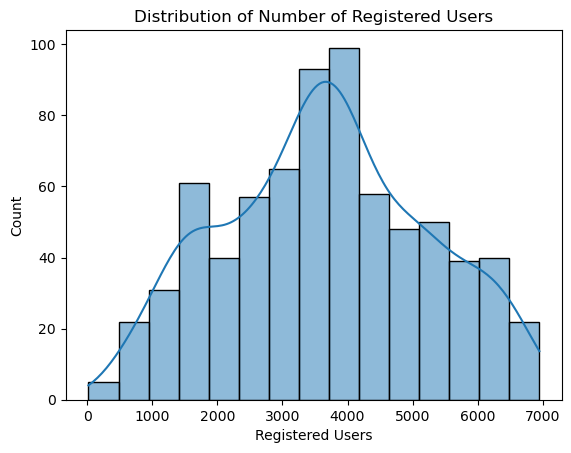

In [394]:
sns.histplot(Bike_Share.registered, bins = 15, kde=True)
plt.title('Distribution of Number of Registered Users')
plt.xlabel('Registered Users')

### The registered users show a more normal distribution, indicating a more consistent and regular usage pattern.

## 5) on number of Total Bike Rentals per Day:

Text(0.5, 0, 'Total Bike Rentals per Day')

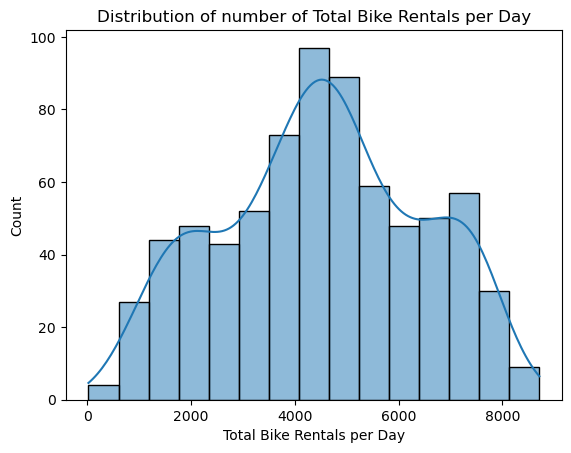

In [395]:
sns.histplot(Bike_Share.cnt, bins = 15, kde=True)
plt.title('Distribution of number of Total Bike Rentals per Day')
plt.xlabel('Total Bike Rentals per Day')

### The total bike rentals (cnt) show a roughly normal distribution, with most days experiencing moderate to high rental activity (around 3000-6000 rentals).

## B. Bivariate Analysis:

In [396]:
# The pairplot below helps visualize the relationships between variables.
#sns.pairplot(Bike_Share)
#plt.show()


### From the above Pair Plot, we can see some highly correlated variables at the Bottom-Right  and Center-Diagonal.
### So, we can conclude that we can consider a Linear Regression Model. 

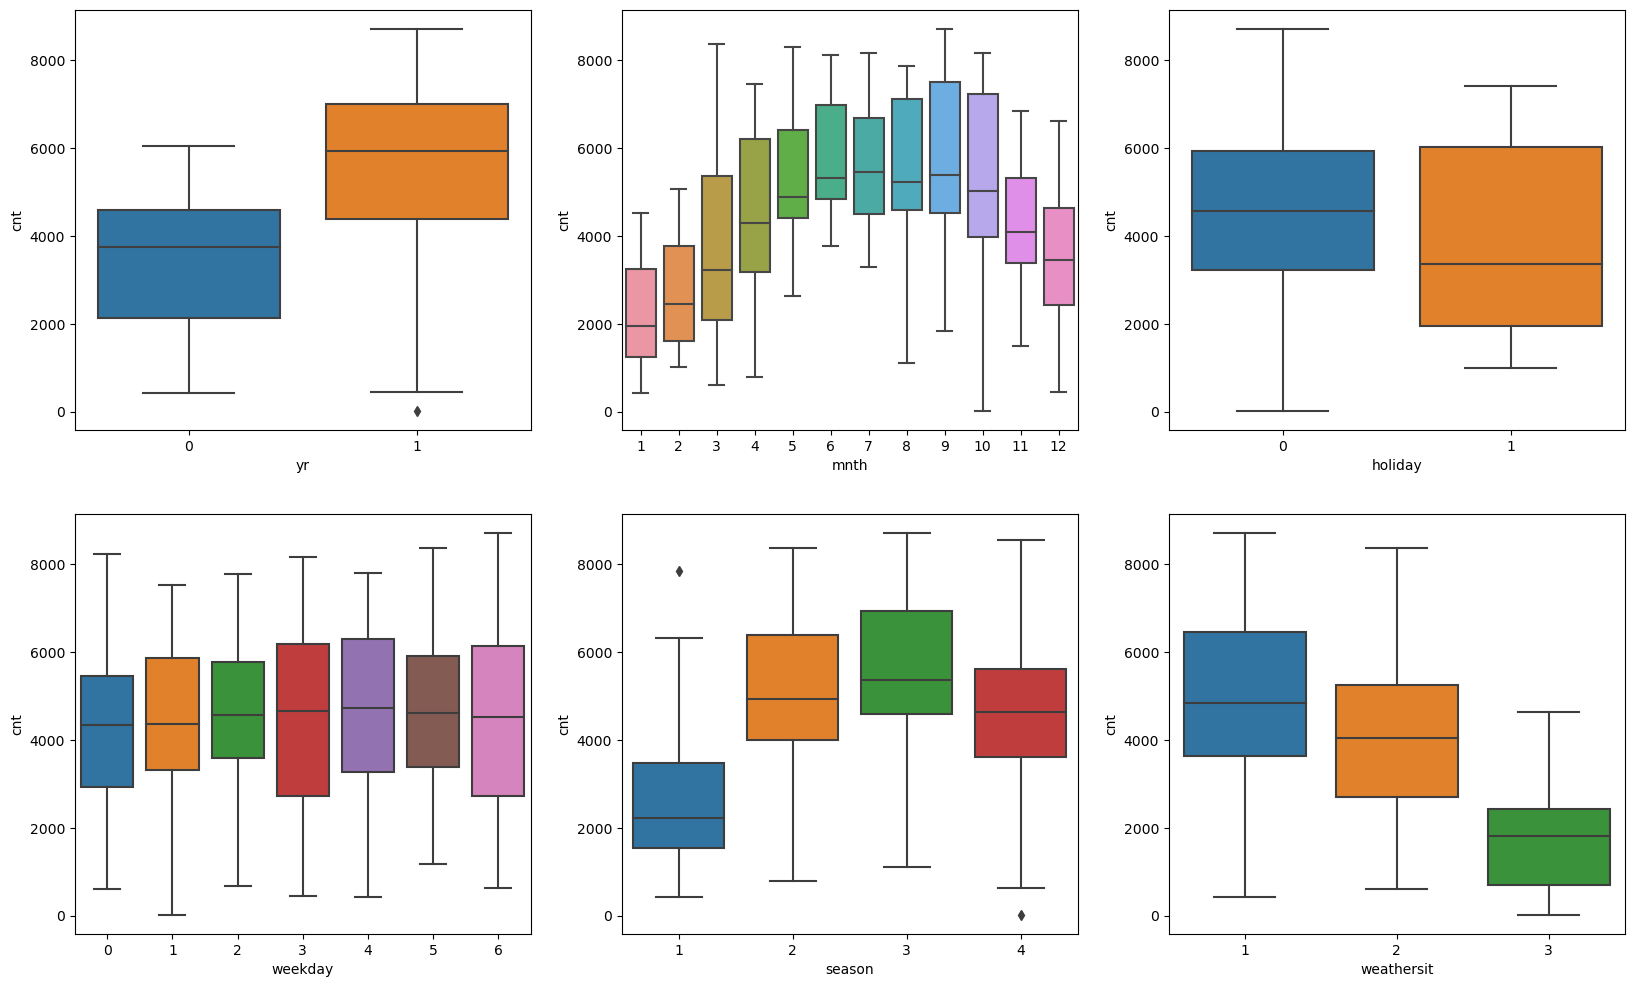

In [397]:
# Visualizing Categorical Variables using BoxPlots
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='yr',y='cnt', data=Bike_Share)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt', data=Bike_Share)
plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt', data=Bike_Share)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt', data=Bike_Share)
plt.subplot(2,3,5)
sns.boxplot(x='season',y='cnt', data=Bike_Share)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt', data=Bike_Share)
plt.show()

## Here are the inferences that can be drawn from each Box plot:

## Year (yr):

### The median count (cnt) is higher in year 2019 compared to year 2018.
### The distribution in year 2019 is also more spread out (higher range), indicating more variability in counts in that year.

## Month (mnth):

### The count is generally lower in the winter months (December to February) and higher in the summer months (June to August).
### The distribution indicates a seasonal pattern where the counts peak in the middle of the year.

## Holiday:

### There is not much difference between holidays (1) and non-holidays (0), though the median count seems slightly lower on holidays.
### The range of counts is wide for both holidays and non-holidays, indicating variability.

## Weekday:

### The median counts are relatively consistent across all days of the week.
### The spread and range are similar across different weekdays, suggesting that the day of the week might not have a strong impact on the count.

## Season:

### The counts are lower in season 1 (which could represent winter) and higher in seasons 2 (spring) and 3 (summer).
### The variation is greater in seasons 2 and 3, suggesting that these seasons might have more fluctuation in the counts.

## Weathersit:

### The count is highest for the first weather condition (1) and decreases as the weather condition worsens (3).
### The box plot for 3 shows a much lower median and a narrower range, indicating fewer counts in poor weather conditions.

## Overall Summary:

### The count is influenced by the year, month, season, and weather situation.
### Counts are higher in the second year, during summer months, in good weather conditions, and in certain seasons (likely spring and summer).
### There is less impact of holidays and weekdays on the count, as these show consistent distributions across their categories.

## C. Multivariate Analysis:

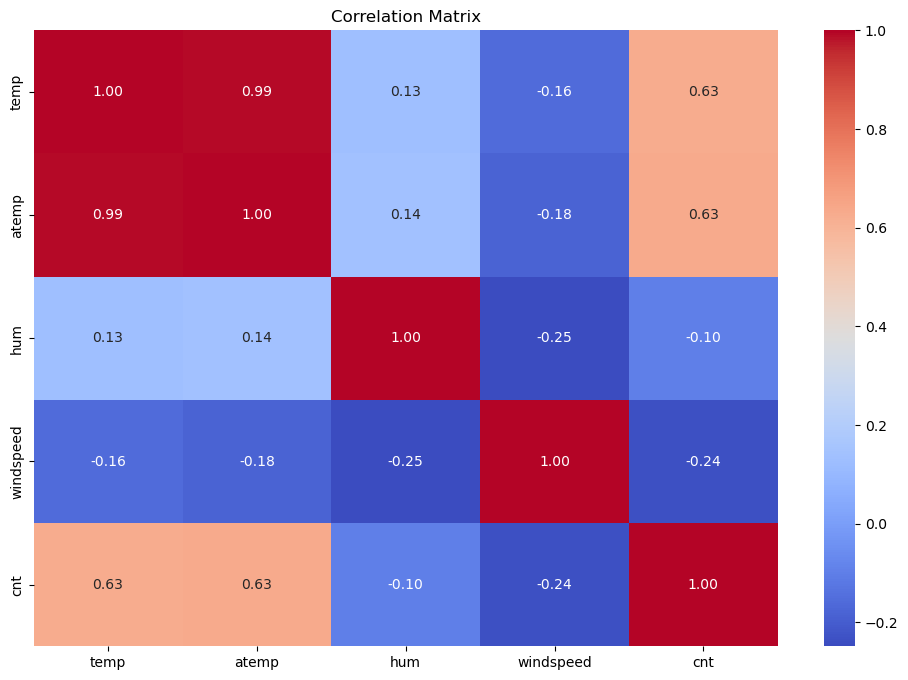

In [398]:
# Defining the list of columns for the correlation matrix
columns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Computing the correlation matrix
correlation_matrix = Bike_Share[columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Inference from Heatmap-1:

### Temperature vs. 'cnt':

### 'temp' and 'atemp' both show a strong positive correlation with 'cnt', again indicating that higher temperatures are associated with increased bike rentals.

### Multicollinearity between 'temp' and 'atemp':

### The correlation between 'temp' and 'atemp' is 0.99, which is extremely high. As mentioned earlier, retaining both of these variables can introduce multicollinearity in our regression model. We can drop one of these variables. Let's drop 'atemp' and keep 'temp'.

### 'windspeed' and 'cnt':

### 'windspeed' shows a moderate negative correlation with 'cnt'. This suggests that higher windspeed is associated with fewer bike rentals, likely because biking is less desirable in windy conditions.

### 'hum' and 'cnt':

### 'hum' (humidity) has a weak negative correlation with 'cnt'. High humidity might make biking less comfortable, slightly reducing the number of bike rentals.

# Step 4: Data Preparation:


## We convert categorical variables such as 'mnth', 'weekday', 'season', and 'weathersit' to string labels and then encode them using dummy variables.

In [399]:
# Converting 'season' and 'weathersit' into categorical variables
Bike_Share['mnth']=Bike_Share['mnth'].map({1: 'Jan',2: 'Feb', 3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec' })
Bike_Share['weekday']= Bike_Share['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' })
Bike_Share['season'] = Bike_Share['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
Bike_Share['weathersit'] = Bike_Share['weathersit'].map({
    1: 'Clear', 
    2: 'Mist + Cloudy', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Snow'
})

# Creating dummy variables for categorical features with more than 2 categories
Bike_Share = pd.get_dummies(Bike_Share, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True, dtype='int')


Bike_Share.head()




,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# II. Model Building and Evaluation 

# Step 5: Feature Selection:

#### Since 'instant' feature is just an identifier, it doesn't provide useful information for modeling and can be safely removed to avoid unnecessary complexity.

### We'll keep the 'mnth' and 'yr' feature and remove the 'dteday' feature to give us a broader picture.

### 'registered' + 'casual' = 'cnt'. So we can keep 'cnt' feature and drop 'casual' and 'registered'

### 'atemp' is highly correlated with 'temp'. So, we can keep 'temp ' and drop 'atemp'

###  We select the features for building the regression model and exclude columns like 'instant', 'dteday', 'temp', 'atemp', 'casual' and 'registered'. 


In [400]:
# Defining the feature variables and dropping the unnecessary variables
Bike_Share = Bike_Share.drop(columns=['instant', 'dteday','atemp','casual', 'registered'])

# Splitting the data into training and testing sets
Bike_Share_train,Bike_Share_test = train_test_split(Bike_Share, test_size=0.3, random_state=100)

# Displaying the number of Rows and Columns of Training and Testing Datasets
print(Bike_Share_train.shape)
print(Bike_Share_test.shape)

(511, 29)
(219, 29)


# Step 6: Feature Scaling:

### We scale the features for better performance of the regression model using Min-Max Scaling Technique.

### Features have been scaled to ensure the model's coefficients are not biased due to differing scales.


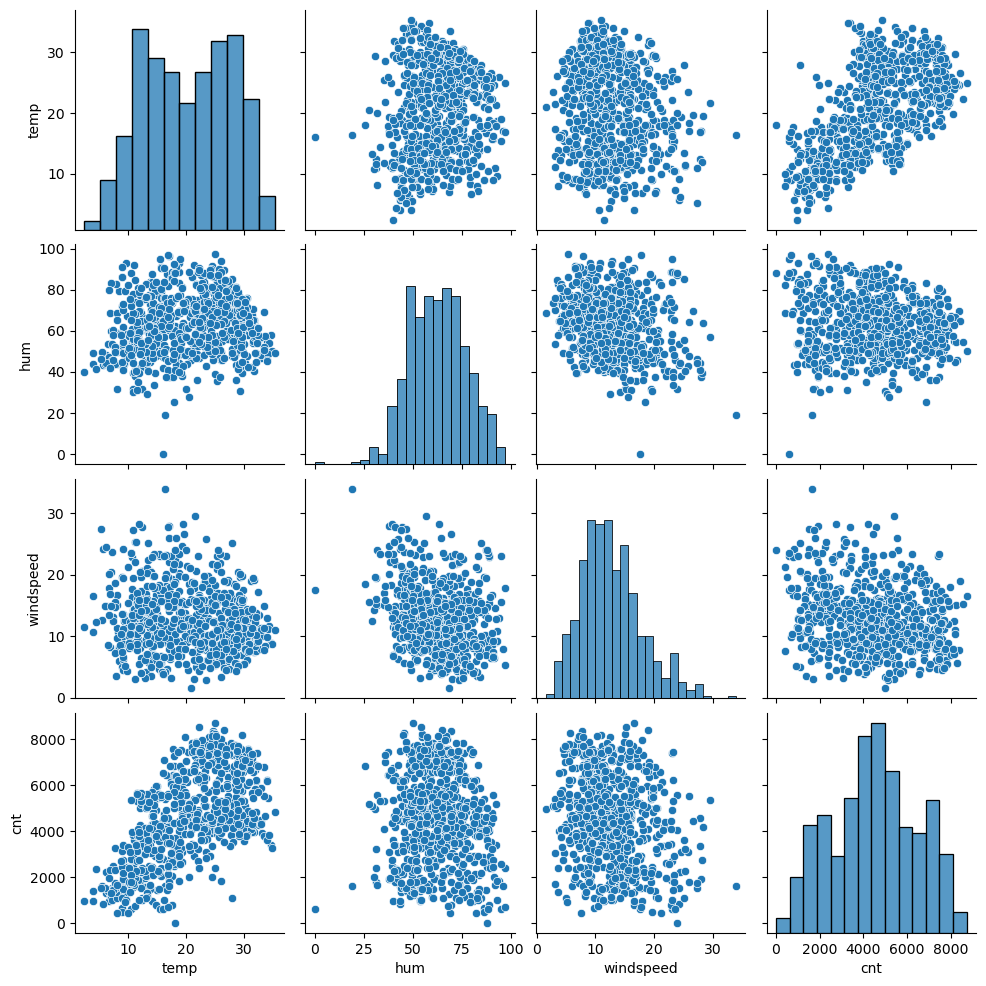

KeyError: "['cnt'] not in index"

In [439]:
# Instantiating an Object
scaler = MinMaxScaler()

# Creating a list of Numeric Variables
num_vars=['temp', 'hum', 'windspeed','cnt']

# The pairplot below helps visualize the relationships between numeric variables.
sns.pairplot(Bike_Share[num_vars])
plt.show()

# Fitting Scaler on Data
Bike_Share_train[num_vars]=scaler.fit_transform(Bike_Share_train[num_vars])
Bike_Share_train.head()

Bike_Share_train[num_vars].describe()



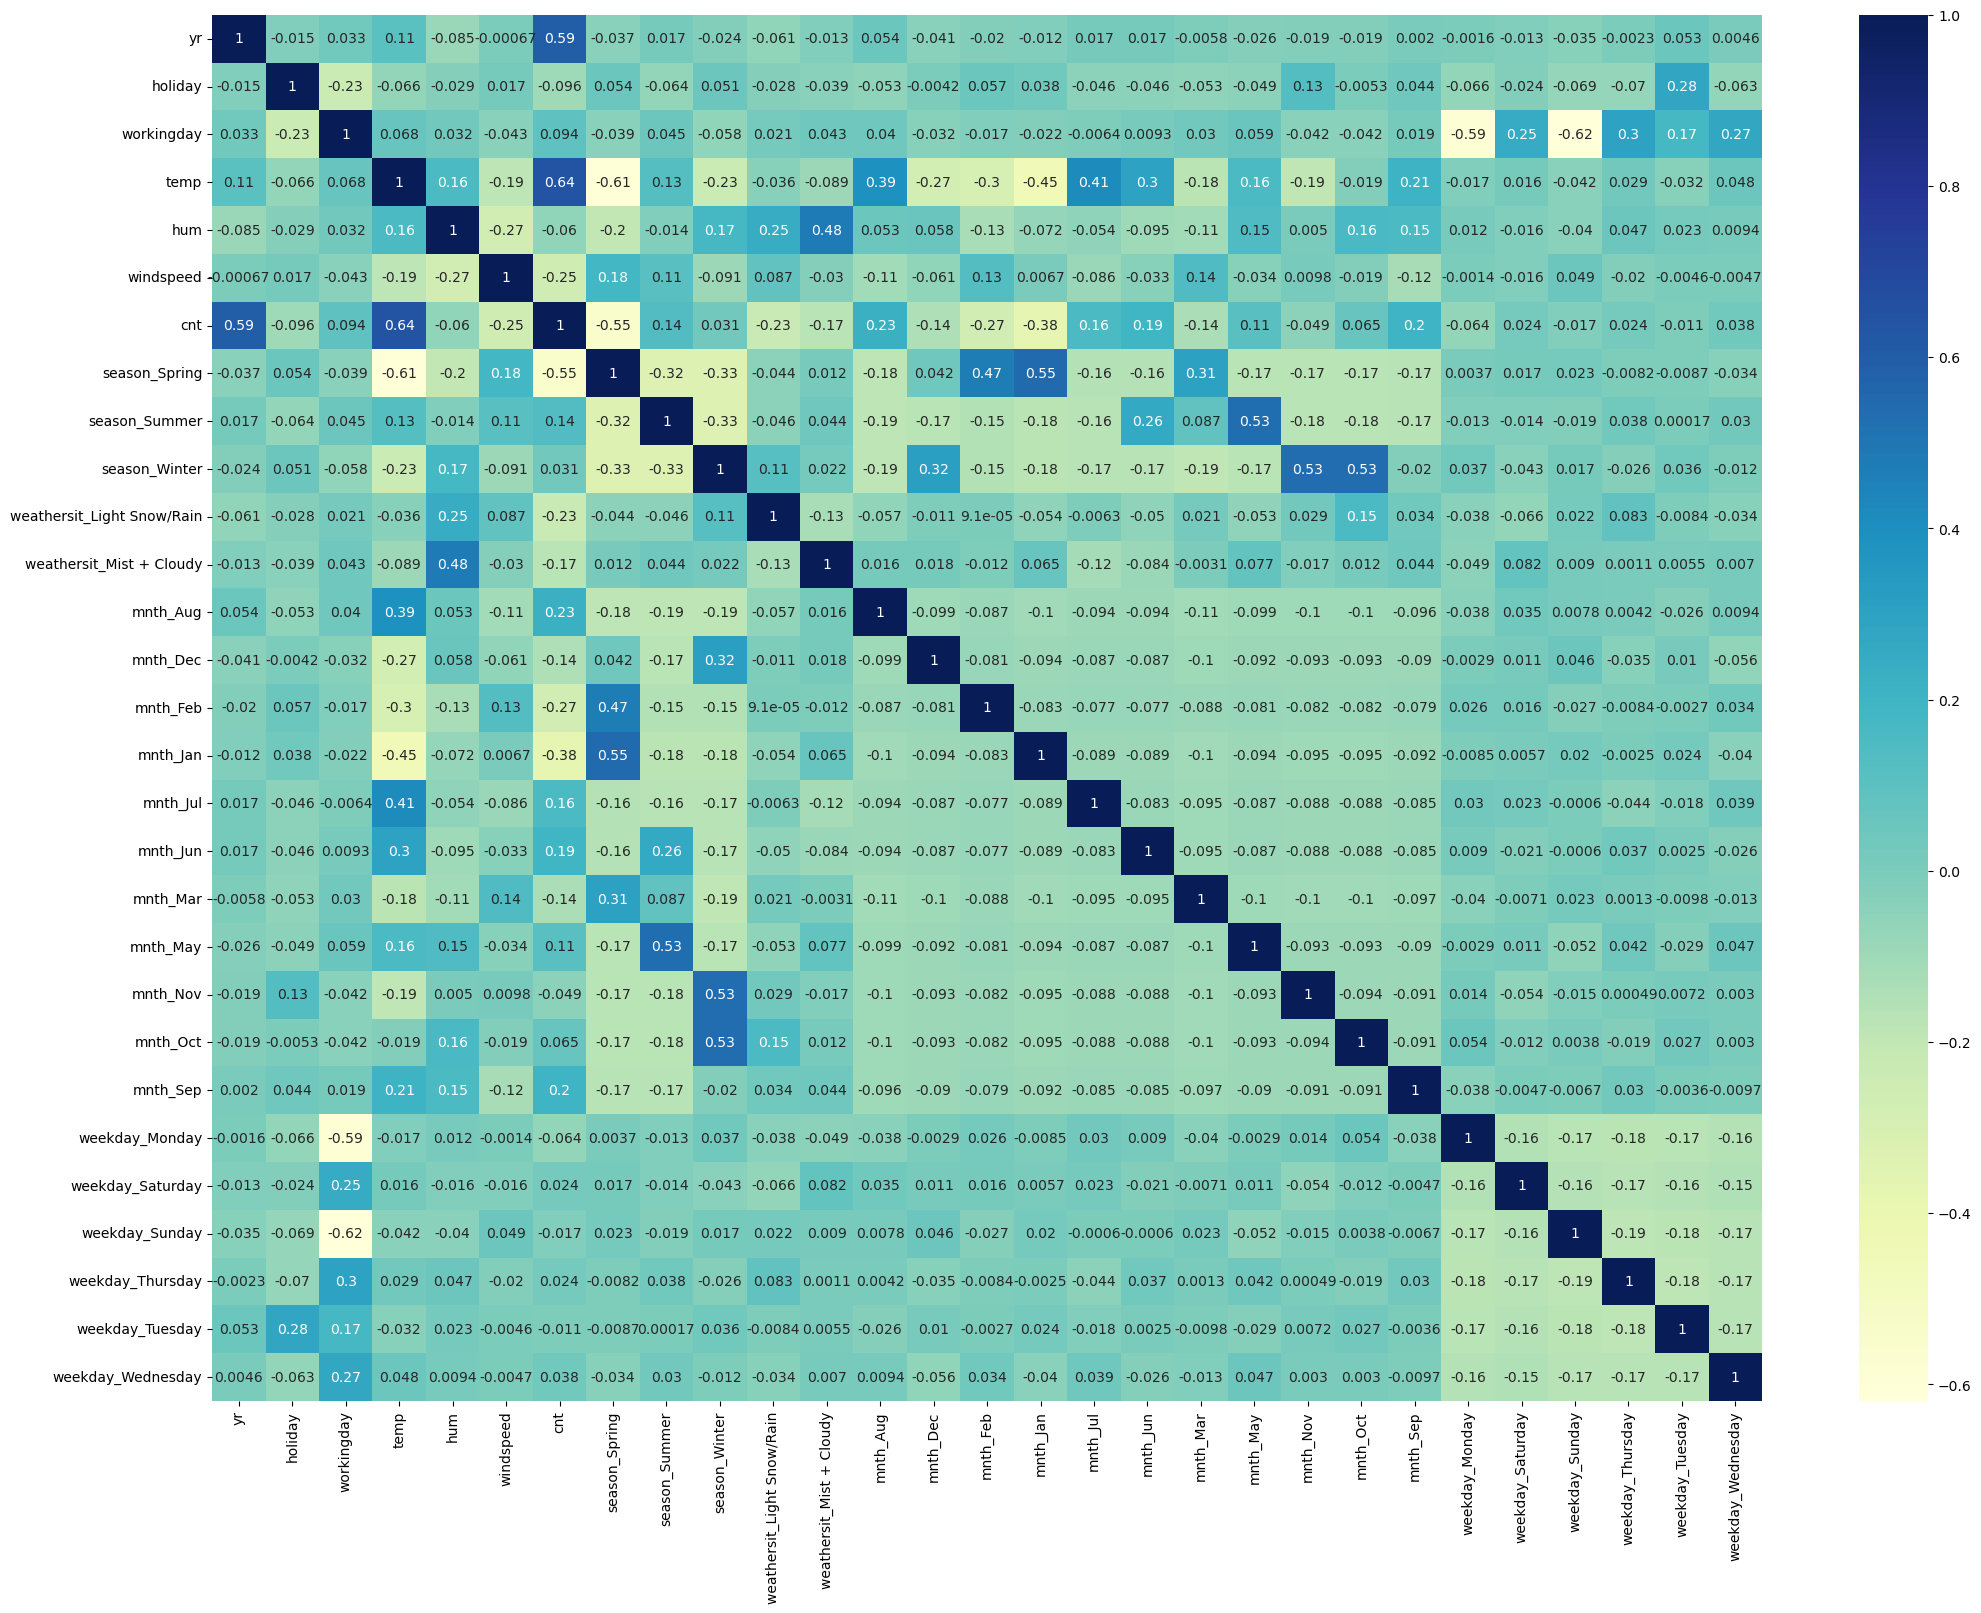

In [402]:
# Plotting the Heatmap for the Training dataset features
plt.figure(figsize=(25,18))
sns.heatmap(Bike_Share_train.corr(),annot=True, cmap="YlGnBu")
plt.show()

## Inference from Heatmap-2:

### Correlation of 'cnt' with Other Variables:

### 'cnt' (the target variable) shows a moderate to strong positive correlation with 'temp' and 'yr' 

### 'cnt' has a weak negative correlation with 'windspeed' and 'hum' (humidity), indicating that as windspeed or humidity increases, bike rentals tend to decrease slightly.

### Season and Weather Variables:

### 'season_Spring', 'season_Summer', and 'season_Winter' are negatively correlated with 'cnt' in some seasons and positively in others.
### Weather conditions like 'weathersit_Light Snow/Rain' and 'weathersit_Mist + Cloudy' have a negative correlation with 'cnt', suggesting that poor weather reduces bike rentals.


### There are several instances of strong correlations between independent variables, such as between months and seasons. This might indicate potential multicollinearity, which should be checked using VIF (Variance Inflation Factor) during model building.

In [403]:
# Splitting Bike_Share_train into X_train and y_train
y_train=Bike_Share_train.pop('cnt')
X_train=Bike_Share_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [404]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Step 7: Training the Model-1:

In [405]:
# Creating new linear model with all features
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train, X_train_sm)

# Fitting the model
lr_model=lr.fit()

# Displaying the parameters 
lr_model.summary()

# The R-squared score gives an indication of how well the model explains the variability in the data.
# This score can be further improved by tuning the model or selecting more relevant features.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.98e-182
Time:                        13:58:54   Log-Likelihood:                 527.76
No. Observations:                 511   AIC:                            -999.5
Df Residuals:                     483   BIC:                            -880.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2400      0.035      6.780      0.000       0.170       0.310
yr                             0.2329      0.008     28.888      0.000       0.217       0.249
holiday                        0.0048      0.024      0.199      0.842      -0.042       0.052
workingday                     0.0909      0.012      7.342      0.000       0.067       0.115
temp                           0.4446      0.046      9.607      0.000       0.354       0.536
hum                           -0.1525      0.039     -3.955      0.000      -0.228      -0.077
windspeed                     -0.1862      0.026     -7.231      0.000      -0.237      -0.136
season_Spring                 -0.0449      0.030     -1.498      0.135      -0.104       0.014
season_Summer                  0.0430      0.026      1.645      0.101      -0.008       0.094
season_Winter                  0.1075      0.028      3.845      0.000       0.053       0.162
weathersit_Light Snow/Rain    -0.2565      0.026     -9.720      0.000      -0.308      -0.205
weathersit_Mist + Cloudy      -0.0598      0.010     -5.733      0.000      -0.080      -0.039
mnth_Aug                       0.0207      0.034      0.617      0.538      -0.045       0.087
mnth_Dec                      -0.0440      0.034     -1.307      0.192      -0.110       0.022
mnth_Feb                      -0.0325      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                      -0.0632      0.034     -1.882      0.060      -0.129       0.003
mnth_Jul                      -0.0336      0.035     -0.962      0.337      -0.102       0.035
mnth_Jun                       0.0049      0.025      0.197      0.844      -0.044       0.054
mnth_Mar                       0.0014      0.025      0.056      0.955      -0.047       0.050
mnth_May                       0.0249      0.021      1.184      0.237      -0.016       0.066
mnth_Nov                      -0.0396      0.036     -1.089      0.277      -0.111       0.032
mnth_Oct                       0.0106      0.036      0.295      0.768      -0.060       0.081
mnth_Sep                       0.0864      0.032      2.704      0.007       0.024       0.149
weekday_Monday                 0.0450      0.014      3.251      0.001       0.018       0.072
weekday_Saturday               0.0091      0.016      0.584      0.559      -0.021       0.040
weekday_Sunday                 0.0993      0.014      7.297      0.000       0.073       0.126
weekday_Thursday               0.0036      0.015      0.247      0.805      -0.025       0.032
weekday_Tuesday               -0.0120      0.015     -0.790      0.430      -0.042       0.018
weekday_Wednesday             -0.0072      0.015     -0.471      0.638      -0.037       0.023
===========================================

### From the Model-1 Summary, we can conclude that  the P-Values of the following features are  greater than 0.05---> 'holiday','season_Spring','season_summer', all months except 'mnth_Sep', all days except 'weekday_Sunday' and 'weekday_Monday' out of which 'mnth_Mar' has the highest p-Value among all of them.



In [406]:
# Calculate VIF

vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
25,weekday_Sunday,inf
2,holiday,inf
3,workingday,inf
23,weekday_Monday,inf
7,season_Spring,10.75
9,season_Winter,9.50
8,season_Summer,8.27
4,temp,7.08
20,mnth_Nov,6.79
21,mnth_Oct,6.57


### From the VIF-1 Summary, we can conclude that the VIF of the following features are greater than 5---> 
### 'weekday_Sunday', 'holiday,workingday',	'weekday_Monday', 'season_Spring','season_Winter',
### 'season_Summer', 'temp','mnth_Nov','mnth_Oct','mnth_Aug','mnth_Jan','mnth_Dec','mnth_Jul'	

# Step 8: Using RFE with a linear regression model for Feature selection(Top 15 Features):

In [407]:
# Initializing linear regression model
lm = LinearRegression()

# Initializing RFE with 15 features to select
rfe = RFE(lm, n_features_to_select=15)

# Fitting RFE
rfe = rfe.fit(X_train_sm.drop('const', axis=1), y_train)

# Displaying the selected features
selected_features = X_train_sm.drop('const', axis=1).columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Summer', 'season_Winter', 'weathersit_Light Snow/Rain',
       'weathersit_Mist + Cloudy', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_Sep', 'weekday_Sunday'],
      dtype='object')


### Using RFE, we identified the top 15 features we got were:'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed','season_Summer', 'season_Winter', 'weathersit_Light Snow/Rain', 'weathersit_Mist + Cloudy', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan', 'mnth_Sep', 'weekday_Sunday'. Our model could still be fine-tuned.

# Step 9: Training the Model-2:

In [408]:
# Train the model with selected features
X_train_rfe = X_train_sm[selected_features]

X_train_const = sm.add_constant(X_train_rfe)
model1 = sm.OLS(y_train, X_train_const)

result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.84e-191
Time:                        13:58:54   Log-Likelihood:                 519.84
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -939.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2115      0.030      7.041      0.000       0.152       0.271
yr                             0.2304      0.008     28.833      0.000       0.215       0.246
holiday                       -0.0576      0.027     -2.140      0.033      -0.110      -0.005
workingday                     0.0444      0.012      3.851      0.000       0.022       0.067
temp                           0.5057      0.025     19.953      0.000       0.456       0.556
hum                           -0.1557      0.037     -4.184      0.000      -0.229      -0.083
windspeed                     -0.1908      0.025     -7.500      0.000      -0.241      -0.141
season_Summer                  0.0944      0.011      8.423      0.000       0.072       0.116
season_Winter                  0.1404      0.012     12.198      0.000       0.118       0.163
weathersit_Light Snow/Rain    -0.2488      0.026     -9.535      0.000      -0.300      -0.198
weathersit_Mist + Cloudy      -0.0577      0.010     -5.561      0.000      -0.078      -0.037
mnth_Aug                       0.0497      0.016      3.092      0.002       0.018       0.081
mnth_Dec                      -0.0232      0.016     -1.456      0.146      -0.054       0.008
mnth_Jan                      -0.0432      0.018     -2.431      0.015      -0.078      -0.008
mnth_Sep                       0.1147      0.016      7.149      0.000       0.083       0.146
weekday_Sunday                 0.0536      0.015      3.684      0.000       0.025       0.082
==============================================================================
Omnibus:                       67.370   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.140
Skew:                          -0.691   Prob(JB):                     1.02e-35
Kurtosis:                       5.379   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the Model-2 Summary, we can conclude that the P-Values of  all features except 'mnth_Dec' is less than 0.05.

In [409]:
# Calculate VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,21.12
3,temp,12.49
2,workingday,5.13
5,windspeed,3.85
9,weathersit_Mist + Cloudy,2.18
7,season_Winter,2.09
0,yr,2.05
6,season_Summer,2.00
14,weekday_Sunday,1.94
12,mnth_Jan,1.64


### From the VIF-2 Summary, we can conclude that all features  except, 'hum' , 'temp' and 'workingday' have VIF less than 5. Hence, we can drop 'hum' feature which has highest VIF compared to other features to create a new model without it.



# Step 10: Training the Model-3:


In [410]:
# Remove the Feature with VIF>5
X= X_train_rfe.drop('hum',axis=1)


In [411]:
print(X)

     yr  holiday  workingday      temp  windspeed  season_Summer  \
653   1        0           1  0.509887   0.300794              0   
576   1        0           1  0.815169   0.264686              0   
426   1        0           0  0.442393   0.255342              0   
728   1        0           0  0.245101   0.663106              0   
482   1        0           0  0.395666   0.188475              1   
111   0        0           1  0.345824   0.380981              1   
580   1        0           0  0.914852   0.462538              0   
500   1        0           1  0.719639   0.172431              1   
479   1        0           1  0.520271   0.164434              1   
472   1        0           1  0.503656   0.270032              1   
455   1        0           0  0.456929   0.279394              1   
636   1        0           0  0.602302   0.398358              0   
224   0        0           0  0.780902   0.363639              0   
458   1        0           1  0.601264   0.29811

In [412]:
# Creating model3
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train, X_train_sm)

# Fitting the model
lr_model=lr.fit()

# Displaying the parameters 
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.85e-189
Time:                        13:58:55   Log-Likelihood:                 510.96
No. Observations:                 511   AIC:                            -991.9
Df Residuals:                     496   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1254      0.022      5.637      0.000       0.082       0.169
yr                             0.2341      0.008     28.992      0.000       0.218       0.250
holiday                       -0.0560      0.027     -2.049      0.041      -0.110      -0.002
workingday                     0.0475      0.012      4.063      0.000       0.025       0.071
temp                           0.4801      0.025     19.203      0.000       0.431       0.529
windspeed                     -0.1632      0.025     -6.534      0.000      -0.212      -0.114
season_Summer                  0.0903      0.011      7.956      0.000       0.068       0.113
season_Winter                  0.1308      0.011     11.410      0.000       0.108       0.153
weathersit_Light Snow/Rain    -0.2921      0.024    -12.002      0.000      -0.340      -0.244
weathersit_Mist + Cloudy      -0.0825      0.009     -9.547      0.000      -0.099      -0.066
mnth_Aug                       0.0480      0.016      2.939      0.003       0.016       0.080
mnth_Dec                      -0.0298      0.016     -1.850      0.065      -0.061       0.002
mnth_Jan                      -0.0504      0.018     -2.803      0.005      -0.086      -0.015
mnth_Sep                       0.1083      0.016      6.670      0.000       0.076       0.140
weekday_Sunday                 0.0587      0.015      3.983      0.000       0.030       0.088
==============================================================================
Omnibus:                       66.813   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.030
Skew:                          -0.685   Prob(JB):                     1.78e-35
Kurtosis:                       5.375   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the Model-3 Summary, we can conclude that the P-Values of all the features are less than 0.05, except 'mnth_Dec'. Hence, all features are significant except 'mnth_Dec' and we can drop this feature from our model.

In [413]:
# Calculate VIF

vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,6.55
2,workingday,4.81
4,windspeed,3.71
0,yr,2.05
5,season_Summer,1.93
13,weekday_Sunday,1.88
6,season_Winter,1.74
9,mnth_Aug,1.60
8,weathersit_Mist + Cloudy,1.57
11,mnth_Jan,1.34


### From the VIF-3 Summary, we can conclude that the VIF of 'temp' is slightly greater than 5 and  we can conclude that all features are significant, and the VIF values are within an acceptable range.
### We can  check if by dropping 'temp' feature , the R-Squared value of the model drops or not.

# Step 11: Training the Model-4:

In [414]:
# Remove the Feature with VIF>5
X1= X.drop('temp',axis=1)

In [415]:
# Creating model3
X1_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X1_train_sm)

# Fitting the model
lr_model=lr.fit()

# Displaying the parameters 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.04e-130
Time:                        13:58:55   Log-Likelihood:                 368.93
No. Observations:                 511   AIC:                            -709.9
Df Residuals:                     497   BIC:                            -650.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4296      0.021     20.841      0.000       0.389       0.470
yr                             0.2491      0.011     23.499      0.000       0.228       0.270
holiday                       -0.0757      0.036     -2.100      0.036      -0.147      -0.005
workingday                     0.0493      0.015      3.195      0.001       0.019       0.080
windspeed                     -0.2691      0.032     -8.377      0.000      -0.332      -0.206
season_Summer                  0.1036      0.015      6.928      0.000       0.074       0.133
season_Winter                  0.0862      0.015      5.823      0.000       0.057       0.115
weathersit_Light Snow/Rain    -0.3051      0.032     -9.505      0.000      -0.368      -0.242
weathersit_Mist + Cloudy      -0.0996      0.011     -8.786      0.000      -0.122      -0.077
mnth_Aug                       0.1549      0.020      7.641      0.000       0.115       0.195
mnth_Dec                      -0.1121      0.020     -5.476      0.000      -0.152      -0.072
mnth_Jan                      -0.2174      0.021    -10.477      0.000      -0.258      -0.177
mnth_Sep                       0.1745      0.021      8.338      0.000       0.133       0.216
weekday_Sunday                 0.0567      0.019      2.915      0.004       0.018       0.095
==============================================================================
Omnibus:                       14.089   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.336
Skew:                          -0.317   Prob(JB):                     0.000284
Kurtosis:                       3.604   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [416]:
# Calculate VIF

vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,3.74
3,windspeed,3.46
0,yr,1.93
4,season_Summer,1.79
5,season_Winter,1.72
12,weekday_Sunday,1.67
7,weathersit_Mist + Cloudy,1.57
8,mnth_Aug,1.30
10,mnth_Jan,1.28
9,mnth_Dec,1.25


### Removing 'temp' could reduce multicollinearity slightly, but it might also diminish the model’s predictive accuracy as can be seen by the reduction in R-Squared value of the model. Given that 6.55 is not excessively high, it is better to retain them for now. Hence, we can drop 'mnth_Dec' feature  from our model and create a new model without it

In [417]:
X.head()

,yr,holiday,workingday,temp,windspeed,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy,mnth_Aug,mnth_Dec,mnth_Jan,mnth_Sep,weekday_Sunday
653,1,0,1,0.509887,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.663106,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.188475,1,0,0,1,0,0,0,0,1


In [418]:
X2 = X.drop('mnth_Dec', axis = 1)

In [419]:
# Creating model4
X2_train_sm=sm.add_constant(X2)
lr=sm.OLS(y_train, X2_train_sm)

# Fitting the model
lr_model=lr.fit()

# Displaying the parameters 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.57e-189
Time:                        13:58:55   Log-Likelihood:                 509.20
No. Observations:                 511   AIC:                            -990.4
Df Residuals:                     497   BIC:                            -931.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1142      0.021      5.322      0.000       0.072       0.156
yr                             0.2342      0.008     28.929      0.000       0.218       0.250
holiday                       -0.0550      0.027     -2.005      0.045      -0.109      -0.001
workingday                     0.0471      0.012      4.014      0.000       0.024       0.070
temp                           0.4925      0.024     20.384      0.000       0.445       0.540
windspeed                     -0.1582      0.025     -6.356      0.000      -0.207      -0.109
season_Summer                  0.0930      0.011      8.240      0.000       0.071       0.115
season_Winter                  0.1282      0.011     11.239      0.000       0.106       0.151
weathersit_Light Snow/Rain    -0.2896      0.024    -11.888      0.000      -0.337      -0.242
weathersit_Mist + Cloudy      -0.0825      0.009     -9.522      0.000      -0.100      -0.065
mnth_Aug                       0.0485      0.016      2.964      0.003       0.016       0.081
mnth_Jan                      -0.0429      0.018     -2.445      0.015      -0.077      -0.008
mnth_Sep                       0.1106      0.016      6.816      0.000       0.079       0.143
weekday_Sunday                 0.0575      0.015      3.896      0.000       0.029       0.087
==============================================================================
Omnibus:                       62.543   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.334
Skew:                          -0.653   Prob(JB):                     2.76e-32
Kurtosis:                       5.263   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the Model-4 Summary, we can conclude that the P-Values of all the features are less than 0.05 except 'holiday' feature. Hence, all features are significant  and we can drop 'holiday' feature from this model based on their  p-values.

In [420]:
# Calculate VIF

vif=pd.DataFrame()
vif['Features']=X2.columns
vif['VIF']=[variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,6.48
2,workingday,4.70
4,windspeed,3.70
0,yr,2.05
5,season_Summer,1.91
12,weekday_Sunday,1.84
6,season_Winter,1.63
9,mnth_Aug,1.60
8,weathersit_Mist + Cloudy,1.57
10,mnth_Jan,1.32


### From the VIF-4 Summary, we can conclude that the VIF of 'temp' is slightly greater than 5 and we can conclude that all features are significant, and the VIF values are within an acceptable range.
### We can keep the 'temp' feature, even though  its VIF>5 as dropping it will affect the model's R-Squared Score.

In [421]:
X3 = X2.drop('holiday', axis=1)

In [422]:
# Creating model5
X3_train_sm=sm.add_constant(X3)
lr=sm.OLS(y_train, X3_train_sm)

# Fitting the model
lr_model=lr.fit()

# Displaying the parameters 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.25e-189
Time:                        13:58:55   Log-Likelihood:                 507.14
No. Observations:                 511   AIC:                            -988.3
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1053      0.021      5.001      0.000       0.064       0.147
yr                             0.2343      0.008     28.861      0.000       0.218       0.250
workingday                     0.0552      0.011      5.003      0.000       0.034       0.077
temp                           0.4940      0.024     20.399      0.000       0.446       0.542
windspeed                     -0.1592      0.025     -6.379      0.000      -0.208      -0.110
season_Summer                  0.0936      0.011      8.267      0.000       0.071       0.116
season_Winter                  0.1278      0.011     11.172      0.000       0.105       0.150
weathersit_Light Snow/Rain    -0.2884      0.024    -11.807      0.000      -0.336      -0.240
weathersit_Mist + Cloudy      -0.0820      0.009     -9.442      0.000      -0.099      -0.065
mnth_Aug                       0.0488      0.016      2.969      0.003       0.017       0.081
mnth_Jan                      -0.0435      0.018     -2.472      0.014      -0.078      -0.009
mnth_Sep                       0.1087      0.016      6.690      0.000       0.077       0.141
weekday_Sunday                 0.0658      0.014      4.624      0.000       0.038       0.094
==============================================================================
Omnibus:                       67.661   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.152
Skew:                          -0.689   Prob(JB):                     2.26e-36
Kurtosis:                       5.411   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the Model-5 Summary, we can conclude that the P-Values of all the features are less than 0.05. Hence, all features are significant based on their  p-values.

In [423]:
vif=pd.DataFrame()
vif['Features']=X3.columns
vif['VIF']=[variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,6.33
1,workingday,4.30
3,windspeed,3.61
0,yr,2.05
4,season_Summer,1.91
11,weekday_Sunday,1.75
5,season_Winter,1.60
8,mnth_Aug,1.60
7,weathersit_Mist + Cloudy,1.57
10,mnth_Sep,1.31


### From the VIF-5 Summary, we can conclude that the VIF of 'temp' is slightly greater than 5 and we can conclude that all features are significant, and the VIF values are within an acceptable range.
### We can keep the 'temp' feature, even though  its VIF>5 as dropping it will affect the model's R-Squared Score.
### We can consider this as our final Model.

# Step 11: Residual Analysis:

##  We plot the residuals to check the assumptions of linear regression.

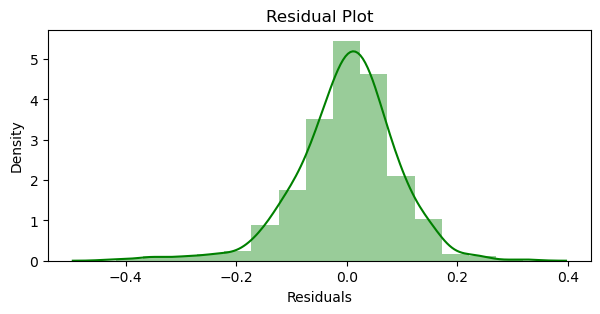

In [424]:
# Plotting residuals to check for any patterns and if mean is 0
y_train_pred=lr_model.predict(X3_train_sm)

res=y_train-y_train_pred

plt.figure(figsize=(7, 3))
sns.distplot(res, color="g", bins = 15, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Plot')
plt.show()

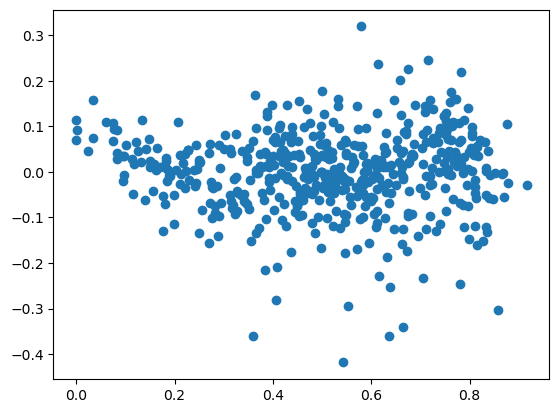

In [425]:
# Scatter plot to look for patterns in residual.
plt.scatter(y_train_pred, res)

((array([-2.99873098, -2.71736362, -2.55919367, -2.44706145, -2.35921324,
         -2.28650333, -2.22418603, -2.16946985, -2.1205685 , -2.07626734,
         -2.03570155, -1.99823274, -1.96337571, -1.93075276, -1.90006389,
         -1.8710667 , -1.84356242, -1.81738595, -1.7923986 , -1.76848272,
         -1.74553756, -1.72347623, -1.70222317, -1.6817123 , -1.66188546,
         -1.64269119, -1.62408371, -1.60602214, -1.5884698 , -1.57139362,
         -1.55476374, -1.53855305, -1.52273688, -1.5072927 , -1.4921999 ,
         -1.47743955, -1.46299426, -1.44884794, -1.43498577, -1.42139399,
         -1.40805983, -1.39497143, -1.38211773, -1.36948841, -1.35707382,
         -1.34486493, -1.33285328, -1.32103091, -1.30939035, -1.29792456,
         -1.28662691, -1.27549113, -1.26451132, -1.25368186, -1.24299748,
         -1.23245313, -1.22204406, -1.21176574, -1.20161387, -1.19158434,
         -1.18167327, -1.17187694, -1.16219179, -1.15261445, -1.14314168,
         -1.1337704 , -1.12449764, -1.

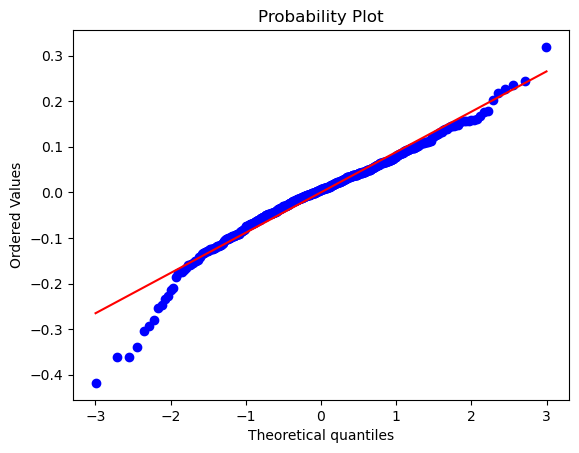

In [426]:
# Step 6: Plot the Q-Q plot
from scipy.stats import probplot

probplot(res, plot=plt)

In [427]:
help(probplot)

Help on function probplot in module scipy.stats._morestats:

probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)
    Calculate quantiles for a probability plot, and optionally show the plot.
    
    Generates a probability plot of sample data against the quantiles of a
    specified theoretical distribution (the normal distribution by default).
    `probplot` optionally calculates a best-fit line for the data and plots the
    results using Matplotlib or a given plot function.
    
    Parameters
    ----------
    x : array_like
        Sample/response data from which `probplot` creates the plot.
    sparams : tuple, optional
        Distribution-specific shape parameters (shape parameters plus location
        and scale).
    dist : str or stats.distributions instance, optional
        Distribution or distribution function name. The default is 'norm' for a
        normal probability plot.  Objects that look enough like a
        stats.distributions instance (i.e.

## Inference of Residual analysis:

### 1.	Linearity: Checked by plotting the residuals against the predicted values; a random scatter suggests linearity.

### 2.	Homoscedasticity: Ensured by observing the residuals; a consistent spread across the residual plot indicates homoscedasticity.

### 3.	Normality of Residuals: Verified using a Q-Q plot; residuals should follow a straight line if they are normally distributed.

### 4.	Multicollinearity: Addressed by calculating the Variance Inflation Factor (VIF); predictors with VIF > 5 were considered for removal.

### 5.	Independence of Errors: Durbin-Watson statistic was used to check for autocorrelation in residuals; a value close to 2 suggests independence.


### So, our model is following the assumptions of linear regression and our model is a good predictor.

# Step 12: Prediction and Model Evaluation:

## We evaluate the model using the R-squared metric.

In [428]:
# Creating a list of Numeric Variables of Test dataset
num_vars=['temp', 'hum', 'windspeed','cnt']

# Fitting Scaler on Test Dataset
Bike_Share_test[num_vars]=scaler.transform(Bike_Share_test[num_vars])
Bike_Share_test.head()



,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [429]:
Bike_Share_test[num_vars].describe()



,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592
std,0.233698,0.148974,0.159947,0.218435
min,0.046591,0.261915,-0.042808,0.048205
25%,0.354650,0.527265,0.198517,0.377531
50%,0.558691,0.627737,0.299459,0.524275
75%,0.759096,0.743928,0.403048,0.672745
max,0.984424,1.002146,0.807474,0.963300


In [430]:
X_test=Bike_Share_test[selected_features]

In [431]:
#Adding a constant to X_test
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy,mnth_Aug,mnth_Dec,mnth_Jan,mnth_Sep,weekday_Sunday
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,1,0,0,0,0,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0,0


In [432]:
X_test_sm= X_test_sm.drop(['hum','mnth_Dec','holiday'],axis=1)

In [433]:
# Popping 'cnt' from Bike_Share_test 
y_test=Bike_Share_test.pop('cnt')

# Predicting y_test dataset
y_test_pred=lr_model.predict(X_test_sm)

In [434]:
# Calculate R-squared on Test Dataset
r2 = r2_score(y_test, y_test_pred)
print("R-squared on test set:", r2)

R-squared on test set: 0.7947375949913945


In [435]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [436]:
print('training r2_Score:', round(r2_train,4))
print('test r2_Score:', round(r2_test,4))

training r2_Score: 0.8404
test r2_Score: 0.7947


<Axes: xlabel='cnt'>

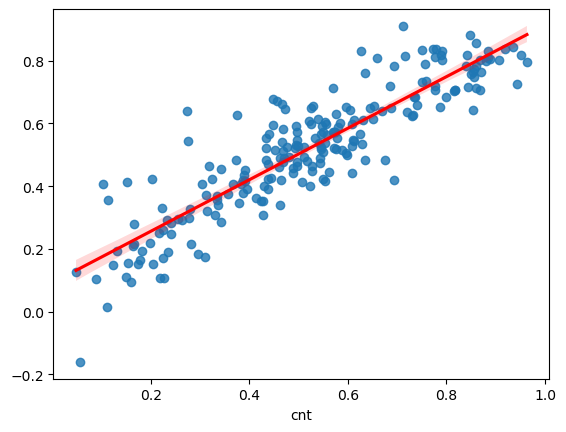

In [437]:
sns.regplot(x = y_test,y = y_test_pred, line_kws={'color':'red'})

# III. Model Interpretation

In [438]:
# Displaying the parameters
print(lr_model.summary())

# Extracting the coefficients
coefficients = lr_model.params

# Constructing the final model equation
equation = "y = "
for i in range(len(coefficients)):
    if i == 0:
        equation += f"{coefficients[i]:.4f} * {coefficients.index[i]}"
    else:
        equation += f" + {coefficients[i]:.4f} * {coefficients.index[i]}"

print("Final Model Equation:")
print(equation)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.25e-189
Time:                        13:58:57   Log-Likelihood:                 507.14
No. Observations:                 511   AIC:                            -988.3
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Intercept (const): 0.1053, with a standard error of 0.021. The VIF is 62.10, and the p-value is 0.000, indicating that the intercept is statistically significant.

### Year (yr): 0.2343, with a standard error of 0.008. The VIF is 2.05, and the p-value is 0.000, indicating a strong positive relationship with the dependent variable. As the Year increases by a unit, the demand for Bike Share increases by 0.2343 units.

### workingday: 0.0552, with a standard error of 0.011. The VIF is  4.3, and the p-value is 0.000, indicating a significant positive relationship. As the workingday increases by a unit, the demand for Bike Share increases by 0.0552 units.           

### temp:0.4940, with a standard error of  0.024. The VIF is  6.33, and the p-value is 0.000, indicating a strong positive relationship. As the Temperature increases by a unit, the demand for Bike Share increases by 0.4940 units.  
### windspeed : -0.1592 with a standard error of  0.025. The VIF is  3.61, and the p-value is 0.000, indicating a significant negative relationship. As the Windspeed increases by a unit, the demand for Bike Share decreases by 0.1592 units.  

### season_Summer: 0.0936  with a standard error of  0.011 . The VIF is  1.91, and the p-value is 0.000, indicating a significant positive relationship. As the Season (Summer) increases by a unit, the demand for Bike Share increases by 0.0936 units.            

### season_Winter: 0.1278  with a standard error of  0.011. The VIF is  1.60, and the p-value is 0.000, indicating a significant positive relationship. As the Season (Winter) increases by a unit, the demand for Bike Share increases by 0.1278 units.      

### weathersit_Light Snow/Rain:-0.2884 with a standard error of  0.024 . The VIF is 1.08, and the p-value is 0.000, indicating a significant negative relationship. As the Weather Situation (Light Snow/Rain) increases by a unit, the demand for Bike Share decreases by 0.2884 units.

### weathersit_Mist + Cloudy: -0.0820   with a standard error of 0.009  . The VIF is 1.57, and the p-value is 0.000, indicating a significant negative relationship. As the Weather Situation(Mist+Cloudy) increases by a unit, the demand for Bike Share decreases by 0.0820  units.

### mnth_Jan:  -0.0435 with a standard error of  0.009 . The VIF is 1.30, and the p-value is  0.014, indicating a significant negative relationship. As the Month (January) increases by a unit, the demand for Bike Share decreases by 0.0435 units.  

### mnth_Aug: 0.0488 with a standard error of 0.016. The VIF is 1.60, and the p-value is  0.003, indicating a significant positive relationship. As the Month (August) increases by a unit, the demand for Bike Share increases by 0.0488 units. 

### mnth_Sep: 0.1087  with a standard error of  0.017. The VIF is 1.31, and the p-value is 0.000, indicating a significant positive relationship. As the Month(September) increases by a unit, the demand for Bike Share increases by 0.1087 units.


### weekday_Sunday: 0.0658  with a standard error of  0.014. The VIF is 1.75, and the p-value is 0.000, indicating a significant positive relationship. As the Weekday (Sunday) increases by a unit, the demand for Bike Share increases by 0.0658 units.       


### These coefficients represent the change in the dependent variable for a one-unit change in the predictor variable, holding all other variables constant. The p-values indicate that all the predictors are statistically significant at the 0.05 level. 

### Key Factors significantly influencing bike share demand were:-

### 1) Year: As the year progresses, bike share demand tends to increase.
### 2) Temperature: Warmer weather leads to higher demand.
### 3) Season: Summer and winter see increased demand compared to spring and fall.
### 4) Weekday: Sundays generally have higher demand than weekdays.
### 5) Weather: Clear weather is associated with higher demand, while rain or mist decreases it.
### 6) Month: Certain months (like August and September) have higher demand compared to others (like January).

### Specific Interpretations:

### For each unit increase in temperature, bike share demand increases by 0.4940 units, holding other factors constant.
### On a working day compared to a non-working day, demand increases by 0.0552 units.
### In the summer season, demand increases by 0.0936 units compared to spring.

### Factors that decrease the Demand for Bike- Share are : Weather Situations like Light Snow or light Rain and  Mist+Cloudy Sky, Month of January, High windspeed .

### Top 5 Factors that affect the Demand for Bike- Share are : Temperature, Light Snow or light Rain, year, Windspeed and Winter Season.